# About the Data

This dataset is originally from a Kaggle Machine Learning competition. In this project we will be analyzing this dataset to help the marketing and sales teams better understand the demographics of their customers and reduce operational costs with the help of a machine learning model. 

Link: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
Link: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

# Libraries Required

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from statsmodels.formula.api import logit
import statsmodels.api as sm

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


# Import train_test_spilt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
# Import warnings# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the scikitplot module
!pip install scikit-plot
import scikitplot as skplt

In [5]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import researchpy

# Import Dataset

In [7]:
# Import the dataset using pd.read_excel
data = pd.read_excel(r'C:\Users\photo\Desktop\Springboard Project Data\Capstone_2\train.xlsx')

In [8]:
# Create the pandas DataFrame
df = pd.DataFrame(data)

In [9]:
# Set the index of the DataFrame to 'id'
df = df.set_index('id')

In [10]:
# Check the number of rows and columns
df.shape

(381109, 11)

In [11]:
# Look at the first 5 rows of data
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [12]:
# Check the number of unique values of each column
df.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          48838
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                381109 non-null  object
 1   Age                   381109 non-null  int64 
 2   Driving_License       381109 non-null  int64 
 3   Region_Code           381109 non-null  int64 
 4   Previously_Insured    381109 non-null  int64 
 5   Vehicle_Age           381109 non-null  object
 6   Vehicle_Damage        381109 non-null  object
 7   Annual_Premium        381109 non-null  int64 
 8   Policy_Sales_Channel  381109 non-null  int64 
 9   Vintage               381109 non-null  int64 
 10  Response              381109 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 34.9+ MB


In [14]:
# Measures of spread for numerical features
df[['Age', 'Annual_Premium', 'Vintage']].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


Description of Variables:
- id - unique ID for the customer this was set to the index
- Gender (Categorical/Dichotomous) - Gender of customer (Male or Female)
- Driving_License (Categorical/Dichotomous) - 0 : Customer does not have DL, 1 : Customer does have DL
- Previously Insured (Categorical/Dichotomous) - 1: Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Damage (Categorical/Dichotomous) - 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past
- Vehicle_Age (Categorical/ Ordinal) - Age of Vehicle
- Region_Code (Categorical/Nominal) - Unique code for the region of the customer
- Policy Sales Channel (Categorical/Nominal) - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Age (Continuous/Interval) - Age of the customer
- Annual_Premium (Continuous/Ratio) The amount customer needs to pay as premium in the year (Indian Rupees)
- Vintage (Continuous/Interval) - Number of Days, Customer has been associated with the company
- Response (The target) - 1 : Customer is interested, 0 : Customer is not interested

# Data Cleaning 

This dataset does not require cleaning as it is not missing any values. Later on we will assign numerical values to some of the categorical data and adjust the Annual Premium feature to reduce the effects of the outliers.

In [15]:
#Check for null values
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Explore the Dataset

### Categorical Variables - Gender, Driving License, Previously Insured, Vehicle Damage, Vehicle Age, Region Code, Policy Sales Channel, and Response

In [16]:
# Subset of Dataframe with Categorical Variables
df_cat = df.drop(['Age', 'Annual_Premium', 'Vintage'], axis = 1)

df_cat.head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
id,,,,,,,,
1,Male,1,28,0,> 2 Years,Yes,26,1
2,Male,1,3,0,1-2 Year,No,26,0
3,Male,1,28,0,> 2 Years,Yes,26,1
4,Male,1,11,1,< 1 Year,No,152,0
5,Female,1,41,1,< 1 Year,No,152,0


#### Countplots for Each Categorical wth 2 Categories

In [17]:
# Add function to create countplots
def com_countplot(data, a, w=10, h=5):
    fig =plt.subplots(figsize=(w, h))
    sns.countplot(x=a, data=data).set_title(a)
    print('Value Counts: ')
    print(data[a].value_counts())

##### Gender

There are slightly more males(54%) then females(46%) represented in the dataset.

Value Counts: 
Male      206089
Female    175020
Name: Gender, dtype: int64


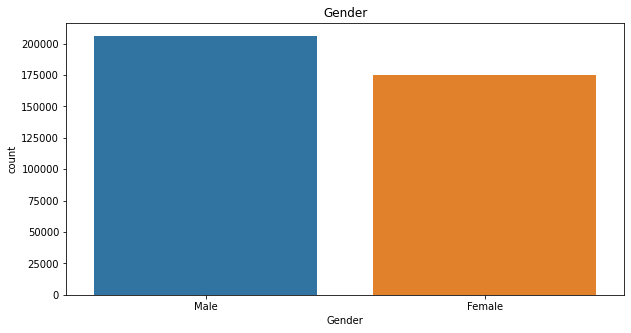

In [18]:
com_countplot(df_cat, 'Gender')

##### Driving License

Most of the respondents in the dataset have a Drivers Licnese(99.7%)

Value Counts: 
1    380297
0       812
Name: Driving_License, dtype: int64


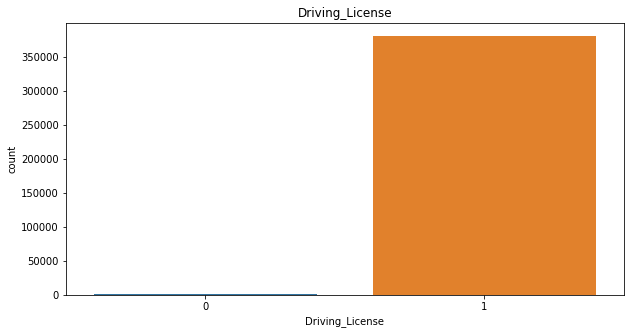

In [19]:
com_countplot(df_cat, 'Driving_License')

##### Previously_Insured

There are more Previously uninsured(54%) then previously insured(46%) respondents.

Value Counts: 
0    206481
1    174628
Name: Previously_Insured, dtype: int64


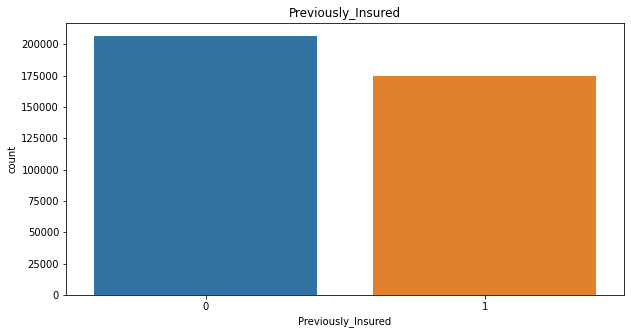

In [20]:
com_countplot(df_cat, 'Previously_Insured')

##### Vehicle_Damage

Almost equal amounts of respondents said Yes(50.4%) and No(49.6%)

Value Counts: 
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


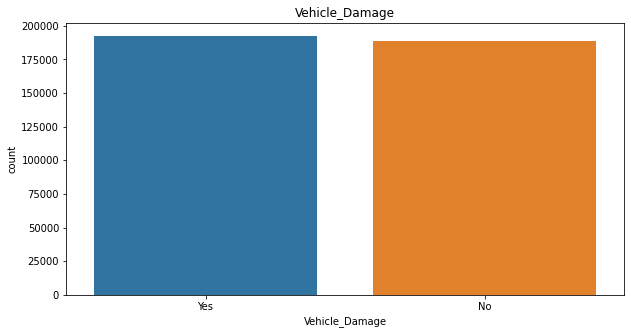

In [21]:
com_countplot(df_cat, 'Vehicle_Damage')

##### Response

12% of respondents were interested in purchasing Vehicle Insurance from thier Health Insurance Company, while 88% were not. 

Value Counts: 
0    334399
1     46710
Name: Response, dtype: int64


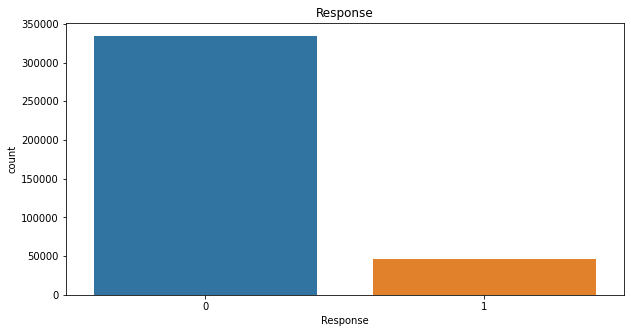

In [22]:
com_countplot(df_cat, 'Response')

#### Create Countplots for Variables with more then 2 Categories

##### Vehicle Age

52% respondents Vehicles were 1 - 2 years old, 43% were < 1 year, and 5% were > 2 years old.

Value Counts: 
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


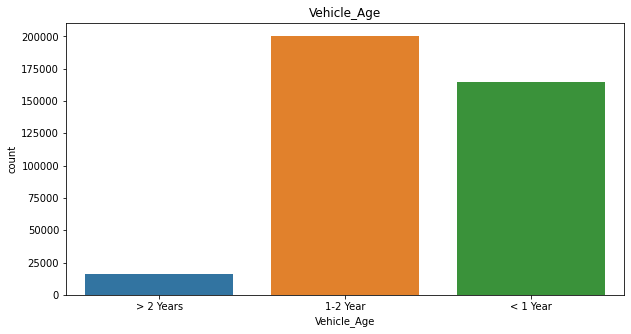

In [23]:
com_countplot(df_cat, 'Vehicle_Age')

##### Region_Code

Clearly some regions (28) were able to have higher rates of participation then others. 

Note: To provide futher insight using the Region_Code feature we would need more information about the physical locations of these regions. 

Value Counts: 
28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
45      5605
37      5501
18      5153
48      4681
14      4678
39      4644
10      4374
21      4266
2       4038
13      4036
7       3279
12      3198
9       3101
27      2823
32      2787
43      2639
17      2617
26      2587
25      2503
24      2415
38      2026
0       2021
16      2007
23      1960
31      1960
20      1935
49      1832
4       1801
34      1664
19      1535
22      1309
40      1295
5       1279
1       1008
44       808
42       591
52       267
51       183
Name: Region_Code, dtype: int64


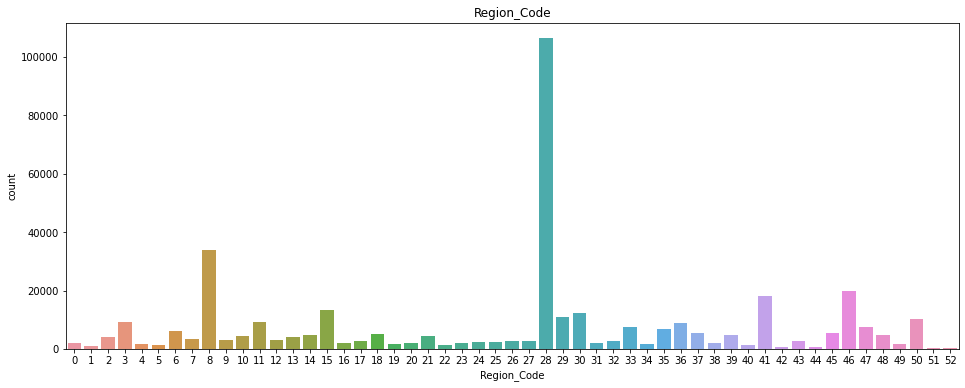

In [24]:
com_countplot(df_cat, 'Region_Code', w = 16, h = 6)

##### Policy_Sales_Channel

Like Region Code, Policy Sales Channel is a categorical variable with high cardinality. 

This feature is also hard to examine as each number represents 2 pieces of information: 
    1. The method of contact 
    2. The employee who made the contact. 
Another dataset that includes these details for each number would be helpful in determining information, such as the best method of contact.

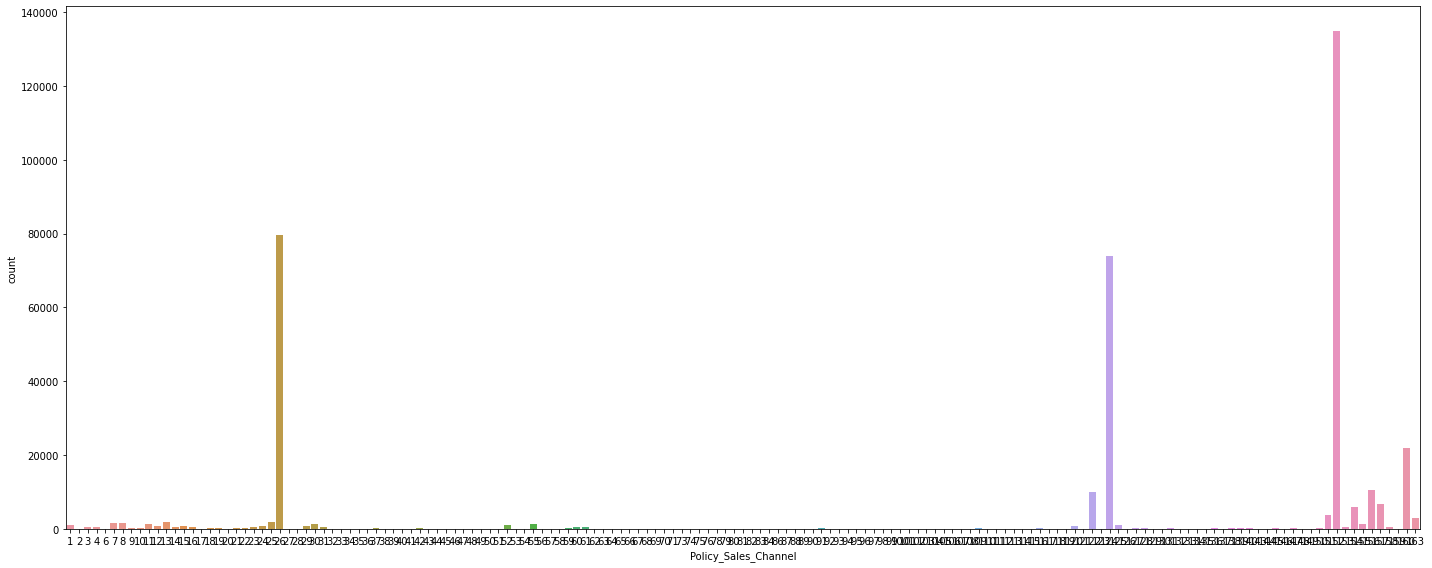

Value Counts: 
<bound method IndexOpsMixin.value_counts of id
1          26
2          26
3          26
4         152
5         152
         ... 
381105     26
381106    152
381107    160
381108    124
381109     26
Name: Policy_Sales_Channel, Length: 381109, dtype: int64>


In [25]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Policy_Sales_Channel",data=df_cat)
plt.tight_layout()
plt.show()

print('Value Counts: ')
print(df_cat['Policy_Sales_Channel'].value_counts)

### Numerical Variables - Age, Annual Premium, and Vintage

In [26]:
#Create subset of the DataFrame for the Numerical Variables
df_num = df[['Age', 'Annual_Premium', 'Vintage']]

In [27]:
# Add function to create boxplots with subplots
def com_box_hist_plots(a, data, n_bin=10, w=10, h=6):
    fig, ax =plt.subplots(2, 1,figsize=(w, h))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    sns.boxplot(a, data=data, ax=ax[0]).set_title(a + ' Boxplot')
    sns.distplot(data[a], hist=True, kde=False, bins=n_bin, ax=ax[1]).set_title(a + ' Histogram')
    print(data[a].describe())

##### Age

Age as a range from 20 to 85 but is skewed to the right with a median at 36.

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64


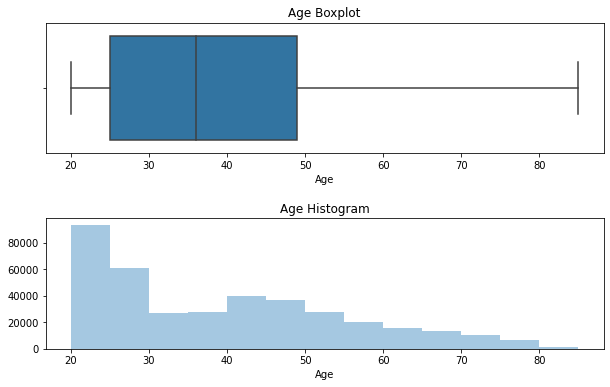

In [28]:
com_box_hist_plots('Age', df_num, n_bin=13)

##### Annual Premium

Annual Premium is also skewed to the right and has a lot of outliers. We will adjust for these outliers before feeding them into the machine learning model. 

Note: These premiums are in Indian Rupees.

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64


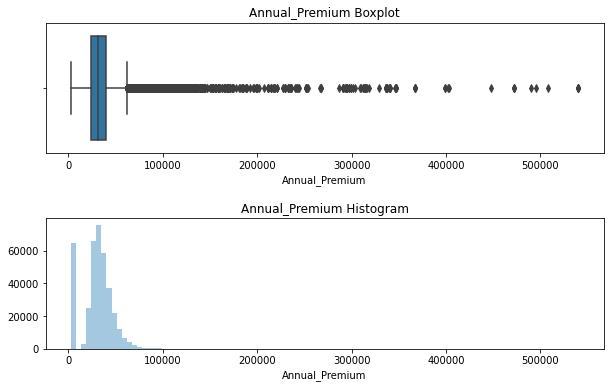

In [29]:
com_box_hist_plots('Annual_Premium', df_num, n_bin=100)

##### Vintage

Vintage has a uniform distribution

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64


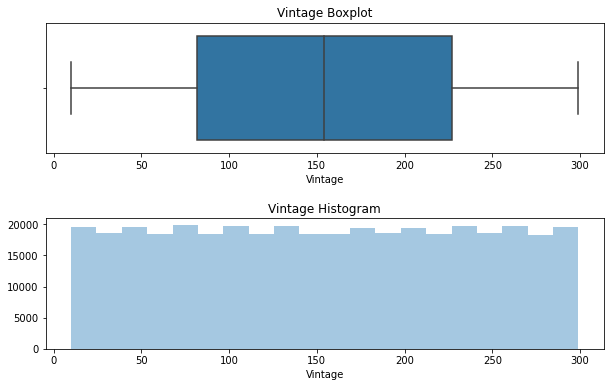

In [30]:
com_box_hist_plots('Vintage', df_num, n_bin=20)

# Issue to Explore

## What features contribute to a high postive Response Rate?

### Comparing Categorical Variables with 2 Levels

Text(0.5, 1.0, 'Vehicle Damage by Response')

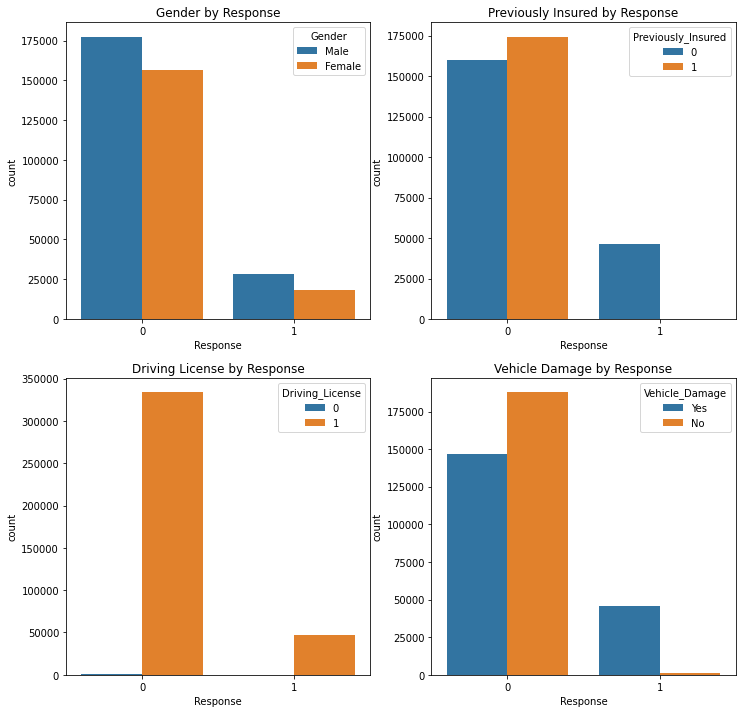

In [31]:
fig_1, axes_1 = plt.subplots(2, 2, figsize=(12,12))
sns.countplot(ax=axes_1[0, 0], data=df, hue='Gender', x='Response').set_title('Gender by Response')
sns.countplot(ax=axes_1[1 , 0], data=df, hue='Driving_License', x='Response').set_title('Driving License by Response')
sns.countplot(ax=axes_1[0, 1], data=df, hue='Previously_Insured', x='Response').set_title('Previously Insured by Response')
sns.countplot(ax=axes_1[1 , 1], data=df, hue='Vehicle_Damage', x='Response').set_title('Vehicle Damage by Response')

The above graphs are comparing the responses of those who said 'Yes'(1) to those who said 'No'(0) when asked if these would be interested in purchasing Vehicle Insurance for each of the cateogrical variables with just 2 responses either 'Yes' or 'No'.

For Gender there does not appear to be a Gender that is more likely to say 'Yes' then 'No'. 

As we discovered earlier most customers who responded had a driver license. It appears that this does not have a major influence on whether or not someone is interested in Vehicle Insurance.

Those who were not Previously Insured were more likely to be interested in Vehicle insurance. We will take a closer look at the relationship between annual premium, previously insured, and response next to see if our rates are competative.

Lastly, those customers who do have previous damage to their vehicles are more interested then in purchasing insurance then those who do not. They might be unsatisified in with their current premiums and it is possible we are able to offer them something better. 

### Previously Insured, Annual_Premium, and Response

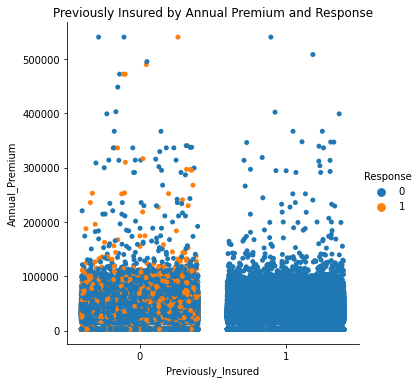

In [32]:
sns.catplot(x='Previously_Insured', y='Annual_Premium', hue='Response', data=df, jitter=0.4)
plt.title('Previously Insured by Annual Premium and Response')
plt.show()

In [33]:
counts = pd.crosstab(df['Response'], df['Previously_Insured'])
print(counts)

Previously_Insured       0       1
Response                          
0                   159929  174470
1                    46552     158


It does not look like the Annual Premium has a large effect on whether or not someone who was Previously Insured will be interested in purchasing Vehicle Insurance. Those who are interested and were previously insured making up less then 0.5% of the total population. 

To improve revenue the company has a couple options. They could either look for ways to attract customers who are already insured or increase the number contacts to custmers who were not Previously Insured.

### Response and Vehicle Age by Vehicle Damage

Text(0.5, 1.0, 'Point Plot of Vehicle Age Compared to Response ')

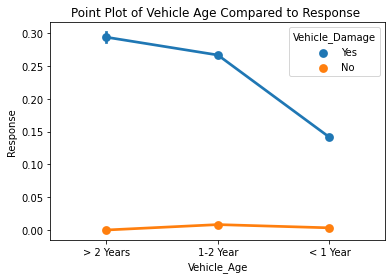

In [34]:
sns.pointplot(x='Vehicle_Age', y='Response', hue='Vehicle_Damage', data=df)
plt.title('Point Plot of Vehicle Age Compared to Response ')

Customers who previously had damage to their Vehicles are more likely to respond 'Yes' when asked if they would be interested in purchasing Vehicle Insurance. Of those who said yes, people with older cars seem more likely to be interested in purchasing Vehicle Insurance.

Customers without previous damage to their Vehicles are less interested in purchasing insurance. The age of their car does not seem to have a great affect on response either.

While the company can take advantge of focusing on those customer who have previously damaged their cars, it would also be prudent to find out how they can create more interest across all customer who do not have damage previous damage to their vehicles.

### Comparing Age, Gender, and Response

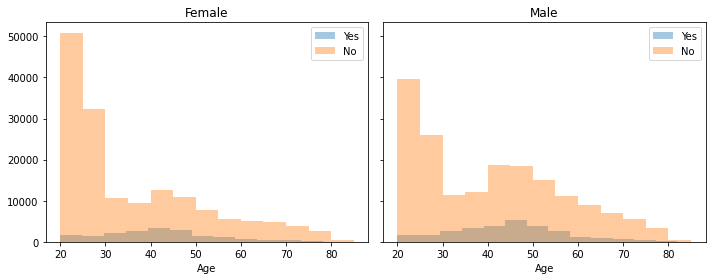

In [35]:
Response_Y = 'Yes'
Response_N = 'No'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4), sharey=True)
women = df[df['Gender']=='Female']
men = df[df['Gender']=='Male']
ax = sns.distplot(women[women['Response']==1].Age.dropna(), bins=13, label = Response_Y, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Response']==0].Age.dropna(), bins=13, label = Response_N, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Response']==1].Age.dropna(), bins=13, label = Response_Y, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Response']==0].Age.dropna(), bins=13, label = Response_N, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
plt.tight_layout()

Both Males and Females who responded 'No' when asked if they would be interested in purchasing Vehcile Insurance are skewed to the right as we saw earlier in our data exploration. 

For Males and Females who responded 'Yes' there is a normal distribution of the data centered around ages 40 to 50. This range could be a good place to start when looking for a target audience. 

### Vintage Boxplots by Response

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

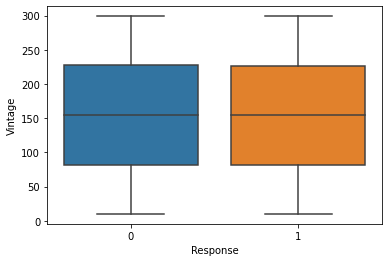

In [36]:
sns.boxplot(x='Response', y='Vintage', data=df)

There does not appear to be a major difference in the measures of spread for Vintage between those customers who were interested in purchasing Vehicle Insurance and those who were not. We would like to see that customer loyalty has been cultivated by increasing that number of customers who have been with us longer to be more interested in also purchasing their Vehicle Insurance from. 

## Machine Learning Models

### Transform Data for Models

Assign numerical values are assigned to the categorical variables so the machine learning algorithums can process them.  

In [107]:
df_model = df.copy()

In [108]:
# Convert Gender, Vehicle_Damage, and Vehicle Age
cat_values = {'Gender' : {'Male': 0, 'Female' : 1},
              'Vehicle_Damage' : {'No' : 0, 'Yes' : 1},
              'Vehicle_Age' : {'< 1 Year' :  1, '1-2 Year' : 2, '> 2 Years' : 3}}

# Make a new Dataset with the new alises for the categorical variables
df_model = df_model.replace(cat_values)

In [109]:
df_model.Annual_Premium.describe

<bound method NDFrame.describe of id
1         40454
2         33536
3         38294
4         28619
5         27496
          ...  
381105    30170
381106    40016
381107    35118
381108    44617
381109    41777
Name: Annual_Premium, Length: 381109, dtype: int64>

To reduce the effects of the outliers in Annual Premium when building our models we are going to use the qcut() method to separate them into 4 equally sized bins.

In [110]:
#Adjust the dataset by dividing Annual Premium into buckets
df_model['Annual_Premium'], bins = pd.qcut(df_model['Annual_Premium'], q=5, retbins=True, labels=False)

print(bins)

[  2630.   21583.6  29082.   34406.   41711.  540165. ]


In [177]:
df_model.Annual_Premium.unique()

array([3, 2, 1, 0, 4], dtype=int64)

In [111]:
df_model.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28,0,3,1,3,26,217,1
2,0,76,1,3,0,2,0,2,26,183,0
3,0,47,1,28,0,3,1,3,26,27,1
4,0,21,1,11,1,1,0,1,152,203,0
5,1,29,1,41,1,1,0,1,152,39,0


Since the Policy Sales Channel feature contains information specific to certain employees, it cannot be included in the model.

In [112]:
df_model = df_model.drop(['Policy_Sales_Channel'], axis=1)

In [113]:
df_model.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
id,,,,,,,,,,
1,0,44,1,28,0,3,1,3,217,1
2,0,76,1,3,0,2,0,2,183,0
3,0,47,1,28,0,3,1,3,27,1
4,0,21,1,11,1,1,0,1,203,0
5,1,29,1,41,1,1,0,1,39,0


### Logistic Regression Model with SMOTE Resampling

Since our data is highly imbalanced for the target variable we are going to use the SMOTE Resampling to train the Logistic Regression Model

In [136]:
X = df_model.drop(['Response'], axis = 1)
y = df_model['Response']

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [137]:
#Define function to return AUC for each variable
def auc(variables, target, basetable):
    X = basetable[variables]
    y = basetable[target].values.ravel()
    # Define which resampling
    resampling = SMOTE()
    model = LogisticRegression()

    # Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
    pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])
    
    # Fit the model on data
    pipeline.fit(X, y)

    predictions = pipeline.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, predictions)
    return auc

#Define function to find next best variable
def next_best(current_variables, candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable

In [138]:
# Define variables for df_model
basetable = df_model
candidate_variables = list(df_model.drop(['Response'], axis=1).columns.values)
current_variables = []
target = ['Response']
number_iterations = 9

# Loop through list of variables to find those with the best auc and order them
for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, target, basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)

Variable added in step 1 is Vehicle_Damage.
Variable added in step 2 is Vehicle_Age.
Variable added in step 3 is Age.
Variable added in step 4 is Previously_Insured.
Variable added in step 5 is Annual_Premium.
Variable added in step 6 is Gender.
Variable added in step 7 is Driving_License.
Variable added in step 8 is Region_Code.
Variable added in step 9 is Vintage.
['Vehicle_Damage', 'Vehicle_Age', 'Age', 'Previously_Insured', 'Annual_Premium', 'Gender', 'Driving_License', 'Region_Code', 'Vintage']


In [139]:
# Define auc_train_test
def auc_train_test(variables, target, train, test):
    X_train = train[variables]
    X_test = test[variables]
    y_train = train[target].values.ravel()
    y_test = test[target].values.ravel()
    
    # Define which resampling
    resampling = SMOTE()
    model = LogisticRegression()

    # Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
    pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])
    
    # Fit the model on data
    pipeline.fit(X_train, y_train)
    
    
    # Calculate the predictions both on train and test data
    predictions_train = pipeline.predict_proba(X_train)[:,1]
    predictions_test = pipeline.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(y_train, predictions_train)
    auc_test = roc_auc_score(y_test, predictions_test)
    return(auc_train, auc_test)

In [140]:
# Apply the auc_train_test function
auc_train, auc_test = auc_train_test(current_variables, ['Response'], train, test)
print(round(auc_train,2))
print(round(auc_test,2))

0.81
0.81


In [141]:
# Decide number of variables to include
auc_values_train = []
auc_values_test = []
variables_evaluate = []

for v in current_variables:
    variables_evaluate.append(v)
    auc_train, auc_test = auc_train_test(variables_evaluate, ['Response'], train, test)
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

In [142]:
res = pd.DataFrame(dict(variables=current_variables, auc=auc_values_test))
best_vars = list(res[:res.auc.idxmax()+1].variables.values)
print(f'Best set of variables: \n{best_vars}')

Best set of variables: 
['Vehicle_Damage', 'Vehicle_Age', 'Age', 'Previously_Insured', 'Annual_Premium', 'Gender', 'Driving_License']


In [143]:
# Fit the model on the best variables
X_train_lr_1 = train[best_vars]
y_train_lr_1 = train['Response']
X_test_lr_1 = test[best_vars]
y_test_lr_1 = test['Response']

# Define which resampling
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline_lr_1 = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])
    
# Fit the model on data
pipeline_lr_1.fit(X_train_lr_1, y_train_lr_1)

Pipeline(steps=[('SMOTE', SMOTE()),
                ('Logistic Regression', LogisticRegression())])

ROC_AUC_Score:
 0.8298231781897443
Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

Confusion matrix:
 [[59485 40835]
 [  328 13685]]


<AxesSubplot:>

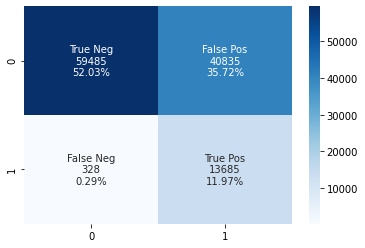

In [144]:
# Predict outcomes
predicted_pipe_lr_1 = pipeline_lr_1.predict(X_test_lr_1)

# Predict probabilities
probs_pipe_lr_1 = pipeline_lr_1.predict_proba(X_test_lr_1)

# Print the ROC curve, classification report and confusion matrix
print('ROC_AUC_Score:\n', roc_auc_score(y_test_lr_1, probs_pipe_lr_1[:,1]))
print('Classifcation report:\n', classification_report(y_test_lr_1, predicted_pipe_lr_1))
conf_mat_pipe_lr_1 = metrics.confusion_matrix(y_true=y_test_lr_1, y_pred=predicted_pipe_lr_1)
print('Confusion matrix:\n', conf_mat_pipe_lr_1)

# Create a labeled Confusion Matrix to Compare Values
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_pipe_lr_1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat_pipe_lr_1.flatten()/np.sum(conf_mat_pipe_lr_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat_pipe_lr_1, annot=labels, fmt='', cmap='Blues')

## Random Forest Classification Model

We are now going to apply a type of Decision Tree know as the Random Forest Classification Model to see if this version of machine learning can improve the outcome of our predictive model.

In [145]:
variables_rf = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Vintage']
target_rf = ['Response']

X_train_rf = train[variables_rf]
X_test_rf = test[variables_rf]
y_train_rf = train[target_rf].values.ravel()
y_test_rf = test[target_rf].values.ravel()

### Random Forest without Resampling

In [146]:
# Instantiate a random forest regressor 'rf'.
rf = RandomForestClassifier(random_state=1)

#Define the grid of hyperparameters to tune
params_rf = {
	      'n_estimators': [100,200,300],
	      'max_depth' : [4,6,8],
          'max_features' : ['sqrt', 'log', 'None'],
          'criterion' : ['gini', 'entropy']
	    }

### Random Forest with Resampling

In [147]:
# Define the model as the random forest
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=1)

#Instantiate a 3-fold CV
grid_rf = GridSearchCV(estimator=rf,
		       param_grid=params_rf,
		       scoring='roc_auc',
		       cv=3,
		       verbose=1,
               n_jobs=-1)

In [148]:
# Fit the model to our training set
grid_rf.fit(X_train_rf, y_train_rf)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 20.1min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['sqrt', 'log', 'None'],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
ROC_AUC_Score:
 0.847158010729044
Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.69    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.69      0.74    114333

Confusion matrix:
 [[65970 34350]
 [  922 13091]]


<AxesSubplot:>

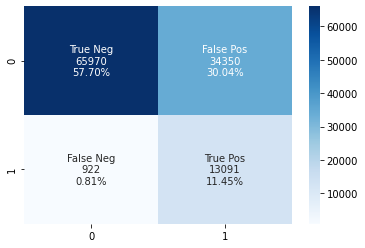

In [149]:
#Extract best hyperparameters from 'grid_rf'
best_hyperparams_rf = grid_rf.best_params_
print(best_hyperparams_rf)

#Extract best model from 'grid_rf'
best_model_rf = grid_rf.best_estimator_

#Predict the test set labels
pred_rf = best_model_rf.predict(X_test_rf)

# Predict probabilities
probs_rf = best_model_rf.predict_proba(X_test_rf)

# Print the ROC curve, classification report and confusion matrix
print('ROC_AUC_Score:\n', roc_auc_score(y_test_rf, probs_rf[:,1]))
print('Classifcation report:\n', classification_report(y_test_rf, pred_rf))
conf_mat_rf = metrics.confusion_matrix(y_true=y_test_rf, y_pred=pred_rf)
print('Confusion matrix:\n', conf_mat_rf)

# Create a labeled Confusion Matrix to Compare Values
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat_rf.flatten()/np.sum(conf_mat_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat_rf, annot=labels, fmt='', cmap='Blues')

In comparing the 2 models overall the Random Forest Model does a slightly better job at predicting classes with an AUC_ROC of 0.8472. However, our goal is to increase the number of successful cross-sells and our Logistic Regression model does 0.5% better at predicting 'Yes' responses correctly and has a lower number of Type ll errors then the Random Forest model.  

# Insights

Through our exploration of the dataset and use of machine learnng we were able to propose an effective model to highlight the most important features in predicting the possibility of a cross-sell and improve the opertional costs of cross-selling to customers.

### Feature Importance

Based on AUC the Logistic Regression model was able to identify several important features from our dataset. 

The set of best features is Vehicle_Damage, Vehicle_Age, Age, Previously_Insured, Annual_Premium, Gender, and Driving Liscene. You will notice that Region_Code and Vintage are not included in this set, which make sense since based on our exploratory data analysis from earlier.

Below is a graph of the AUC for the Logistic Regression model and the best variables listed in order of importance. 

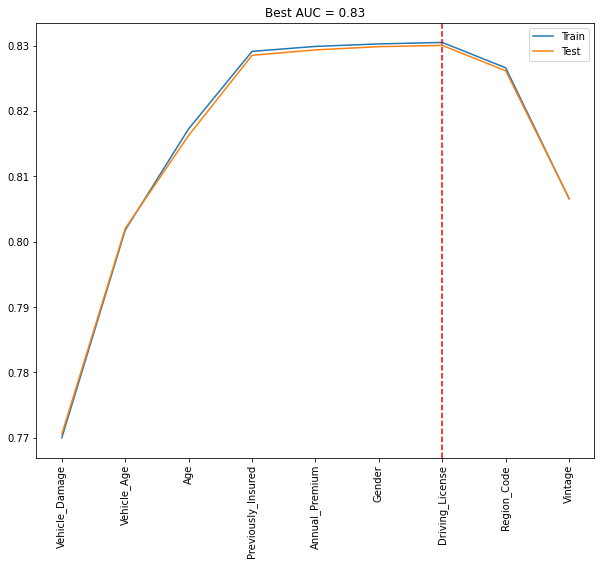

In [170]:
# Graph the AUC curves and find the best set of variables
res = pd.DataFrame(dict(variables=current_variables, auc=auc_values_test))
plt.figure(figsize=(10,8))
x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, current_variables, rotation = 90)
plt.plot(x,y_train, label='Train')
plt.plot(x,y_test, label='Test')
plt.axvline(res.auc.idxmax(), linestyle='dashed', color='r', lw=1.5)
plt.title(f'Best AUC = {round(res.auc.max(),3)}')
plt.legend()
plt.show()

### Cumulative Gains and Lift Curves

Our Logistic Regression Model will be a useful tool to the marketing team as they seek to more effectively cross-sell Vehicle Insurance policies. This is demonstarted by the Cumulative Gains and Lift Curves described below. 

#### Cumulative Gains Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

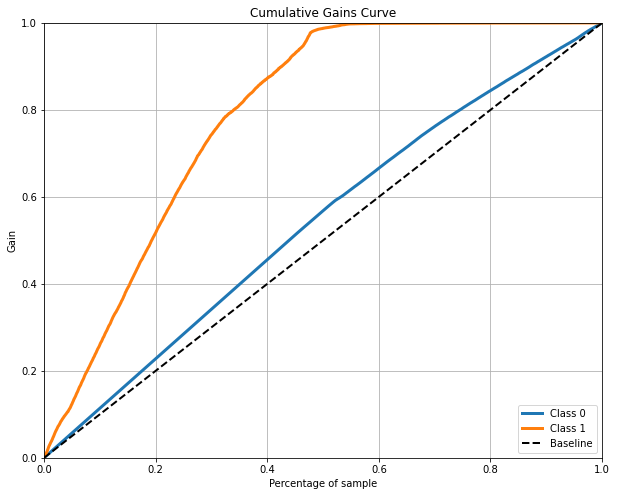

In [169]:
#Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test_lr_1, probs_pipe_lr_1, figsize=(10,8))

In [166]:
# Number of rows in the test set
print('Total Number of Responses : ' + str(test.Response.count()))

# Sum of response variable in the test basetable
print('Total Number of Yes Responses : ' + str(test.Response.sum()))

Total Number of Responses : 114333
Total Number of Yes Responses : 14013


By ranking customers by the probability that they will say 'Yes' to signing up for Vehicle Insurance using the Logistic Regerssion model developed earlier the Insurance company will be able to reduce operational costs by reaching out only to those customers who are interested. 

As an example, by using the Logistic Regression model to reach out to 20% of 114,333 customers, then about 50% of those interested in puchasing vehicle insurance will be included in that set. 

20% of our original model would mean reaching out to about 22,866 customers. The model will rank these customers by most likely to be interested in purchasing car insurance allowing the team to reach about 7,006 of the 14,013 customers in this total population that would be interested.

#### Lift Curve

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

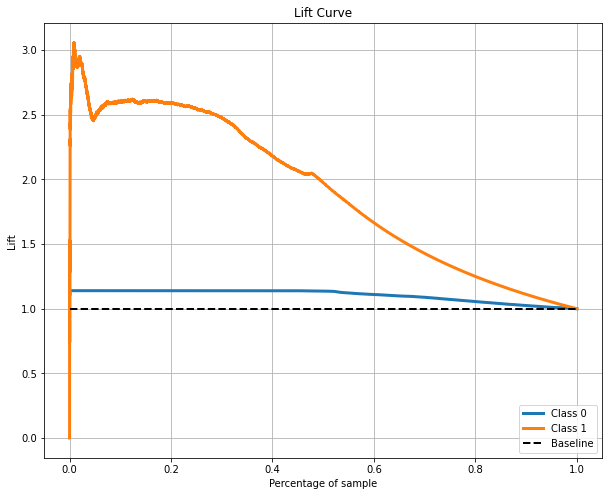

In [167]:
skplt.metrics.plot_lift_curve(y_test_lr_1, probs_pipe_lr_1, figsize=(10,8))

This Lift Curve highlights the advantages of using a model when compared to random chance by showing how much better the model performs. Using the example of the 20%  from earlier this Lift Curve graph shows that the model performs about 2.5 times better then random chance for the top 20% of the customers.

### Further Opportunities

While we were able to create a successful model and provide there were several opportunities for further research discovered during the exploratory phase of this project. 

- The lack of influnece the Vintage variable has on customer interest in a cross-sell could indicate that there is low customer loyalty among the Insurance companies current customers. It may benefit the company to see if this is the case and look into way to cultivate more loyalty from their customers to encourage cross-sells.

- Conduct market reaserach to discover why those who are previously insured by another company are less interested in this company's Vehicle Insurance and to find out why those who do not have damage to their vehicles are less interested in this companies insurance policies. For example, what are the competators offering that this company is not?

- Addtional information about the Region Code and Policy Sales Channel could further improve the insights gained from these variables and could even help create a stronger model.

- A time series feature added to the dataset detail when these customers were contacted could provide further insight into the seasonality of selling vehicle insurance. As an example, this information could be helping as marketing and sales teams are planngin their next campaign. 